In [1]:
path = r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\globalterrorism.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv(path, encoding='latin-1')

In [4]:
data.columns

Index(['id', 'year', 'month', 'dayInMonth', 'extended?', 'countryC', 'country',
       'regionC', 'region', 'provstate', 'city', 'latitude', 'longitude',
       'success', 'suicide', 'attacktype1', 'targtype1', 'targsubtype1',
       'corp1', 'gname', 'motive', 'individual', 'claimed?', 'claimmode',
       'weaptype1', 'weapsubtype1_txt', 'weaptype2', 'weapsubtype2',
       'weapdetail', 'nkill', 'nwound', 'property?', 'propertyDemaged',
       'ishostkid', 'ransom', 'ransomamt', 'nreleased', 'scite1', 'scite2',
       'scite3', 'dbsource'],
      dtype='object')

In [5]:
#data['sumSites'] = data[['scite1', 'scite2','scite3']].apply(lambda x: x.notna().sum() ,axis=1)

In [6]:
data.drop(['scite1', 'scite2','scite3','countryC','regionC', 'latitude', 'longitude','success', 'suicide','motive', 'individual', 'claimed?',
       'claimmode'],axis = 1,inplace=True)

In [7]:
#data

In [8]:
data.memory_usage().sum()

40698912

In [9]:
data.columns

Index(['id', 'year', 'month', 'dayInMonth', 'extended?', 'country', 'region',
       'provstate', 'city', 'attacktype1', 'targtype1', 'targsubtype1',
       'corp1', 'gname', 'weaptype1', 'weapsubtype1_txt', 'weaptype2',
       'weapsubtype2', 'weapdetail', 'nkill', 'nwound', 'property?',
       'propertyDemaged', 'ishostkid', 'ransom', 'ransomamt', 'nreleased',
       'dbsource'],
      dtype='object')

In [10]:
data.shape


(181691, 28)

In [11]:
#data= data.sample(frac =0.05, random_state =101)

In [12]:
data.shape

(181691, 28)

In [13]:
data.memory_usage().sum()

40698912

In [14]:
###imported functions section

In [15]:
dic = {'l':(24,18),'m':(16,12),'s':(12,8)}    
  
def saver(st):
    plt.savefig(r'C:\Users\97250\Desktop\studied\R ,python\Datasets Kaggle\Outputs data\globalTerrorism\'' + st + '.png')
 

In [16]:
         
# visual plots 
def showBar(data,s = 'm',st=''):
    
    scale = dic[s]
    data.plot(kind = 'bar',color = 'gold',figsize = scale,fontsize = scale[0]+4)
    plt.title("\n " + st + " \n",fontsize = 2*scale[0])
    plt.legend(loc='upper right',prop={'size':1.2*scale[0]})    


In [17]:
       
# visual plots 
def showLine(data,s = 'm',st=''):
    
    scale = dic[s]
    data.plot(kind = 'line', lw = (scale[0]//4),figsize = scale,fontsize = scale[0]+4)
    plt.title("\n " + st + " \n",fontsize = 2*scale[0])
    plt.legend(loc='upper right',prop={'size':1.2*scale[0]})    


In [18]:
# heatmap function
def heat(data,s='m',st=''):
    
    scale = dic[s]
    
    plt.figure(figsize = scale)
    sns.heatmap(data = data ,lw=1 ,linecolor = 'white',cmap = 'Reds', annot = True)
    plt.title('\n'+ st +' \n',fontsize = 2*scale[0])


In [19]:
# year data
        
# visual plots 
def showTime(data,s = 'm',st=''):

    scale = dic[s]
    data.sort_index().plot(kind = 'line',color = 'black', lw = (scale[0]//4),figsize = scale,fontsize = scale[0]+4)
    plt.title("\n " + st + " \n",fontsize = 2*scale[0])
    plt.legend(loc='upper right',prop={'size':1.2*scale[0]})    
    

In [20]:
def aggPlot(colum , c='nkill',k ='sum',size = 'm',title='',top=10,save=False,data=data):
    
    """
    Aggregation annd plot function.
    
    Input:
        Colum: string or list of strings.- columns to aggregate with.
        c: string, kind of column to agg' on: nkill nwound,ransom,'ransomamt'
        k: string,  sum/mean else-count.
        size: char['s','m','l']  -scale of output
        title: string -title to print
        save: bool - wether to save picture
        
    Return:
        DataFrame's aggregated column(c).
    """
    
    agg = data.groupby(colum)
   
    # These function change due to the data kind I work with.
    agg = agg.sum() if k=='sum' else agg.mean() if k=='mean' else agg.count() if k=='count' else agg.var()
        
    # if given colum is a time kind
    if ''.join(colum).lower() in ['year','month','date','yearmonth','yearmonthday','monthday']:       
        return showTime(data = agg[c]    ,s = size, st= k+' of '+title )
    
    # if tow columns given - most likely this accurs:
    elif len(data[colum].value_counts()) > 50:  #too many categories
        #call 'toppers' for filter.
        agg = toppers(agg = agg ,colum=colum , top=top ,outcome = c)
        
        return showBar(data = agg      ,s = size, st= k+' of '+title )
        
    elif type(colum) != list: # if one column has been given
        return showBar(data = agg[c].sort_values(ascending=False)      ,s = size, st= k+' of '+title ) #inherits params to show()
    
    else: # tow dimentional data or more.
        x = input('Sir, to unstack?  (y/n)')
        if x == 'y':
            return heat(data = agg[c].unstack(0)                   ,s = size, st = k+' of '+title )#inherits params to heat()
        elif x =='n': 
            return agg[[c]].sort_values(ascending = False,by = c)
                
            

In [2]:
#most common publishers

def toppers(agg,colum,outcome,top=10):
    
    """
    This func return data for top parameter.
    """
    #toppers
    toppers = agg[outcome].sort_values(ascending=False)[:top].index
    
    #grab aggregated data that is in these toppers
    agg = agg.reset_index()
    dataOfToppers = agg[agg[colum].isin(toppers)]    
    # just some tecnique in order to present the name of toppers in graph
    dataOfToppers = dataOfToppers[[colum,outcome]].set_index(colum).sort_values(ascending = False,by = outcome)
    
    return dataOfToppers

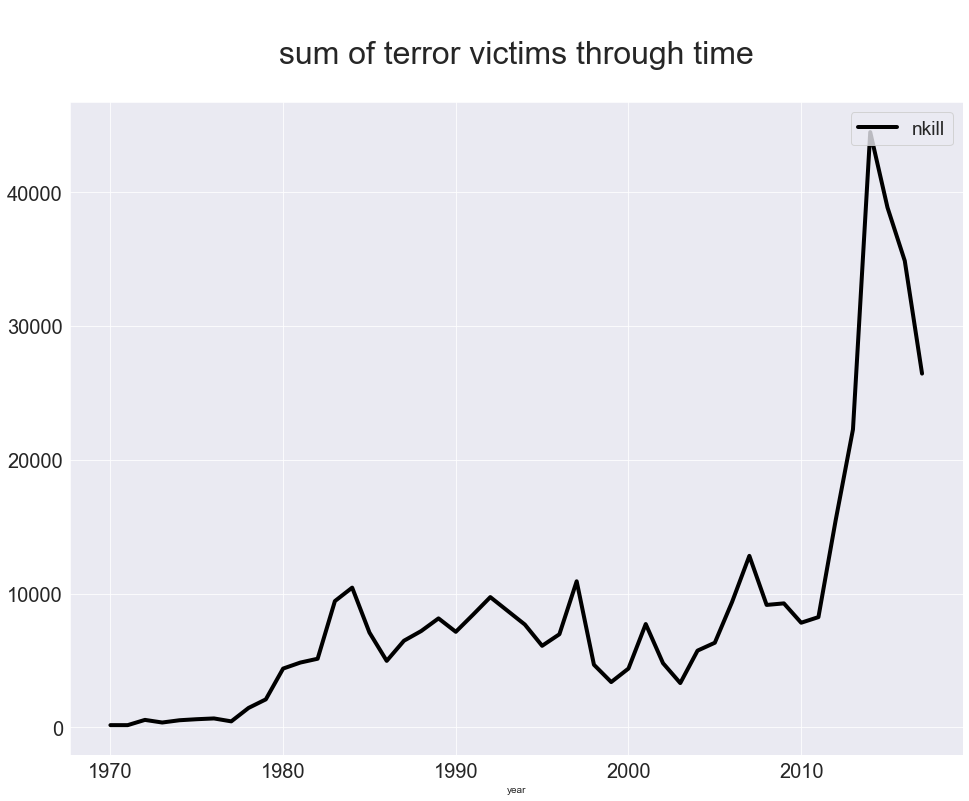

In [22]:
aggPlot('year',c='nkill', title='terror victims through time')

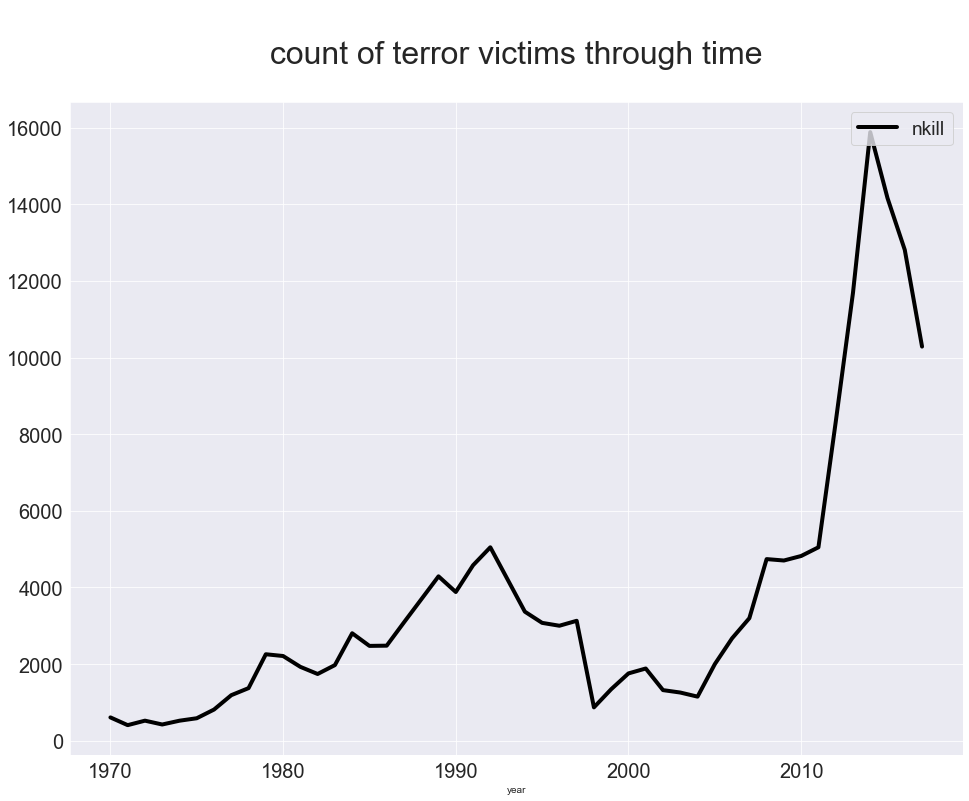

In [23]:
aggPlot('year',c='nkill', k='count',title='terror attacks with victims through time')

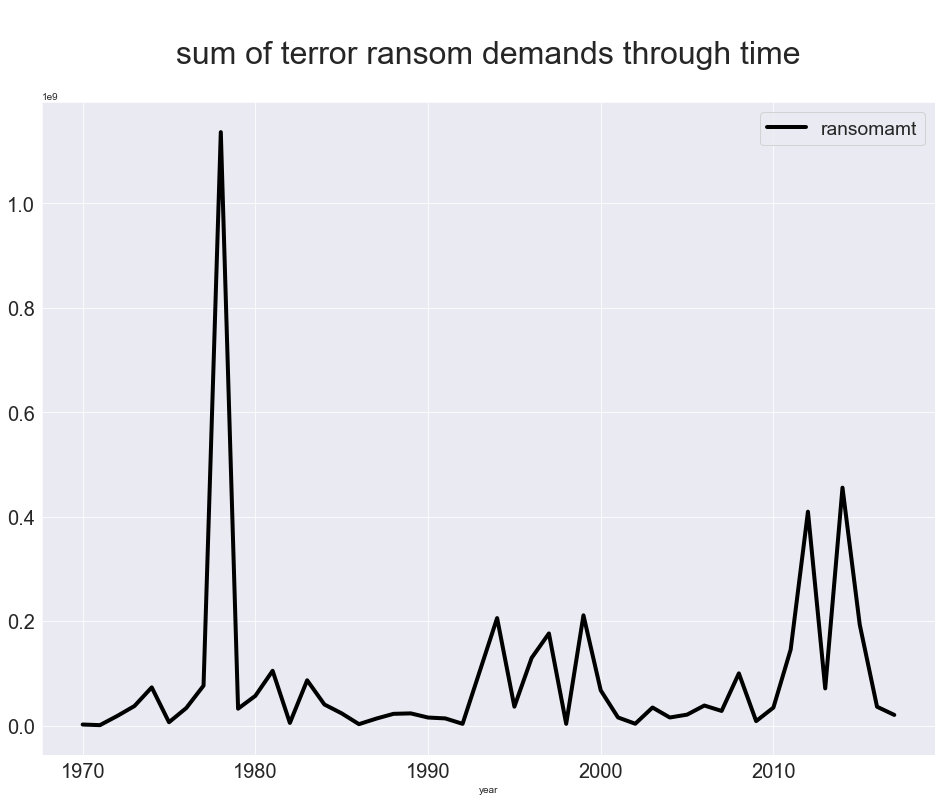

In [24]:
aggPlot('year',c='ransomamt',k='sum' ,title='terror ransom demands through time')

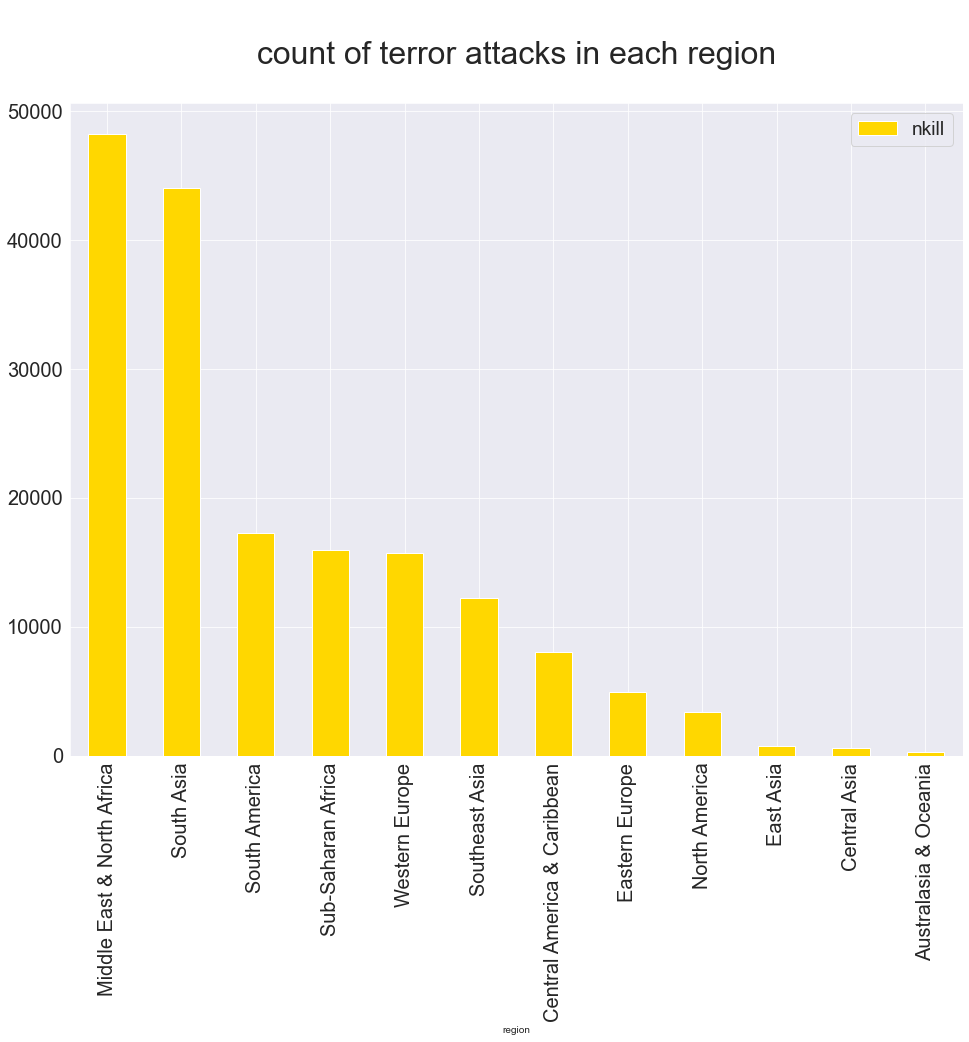

In [25]:
aggPlot('region',c = 'nkill',k='count' ,title='terror attacks in each region')

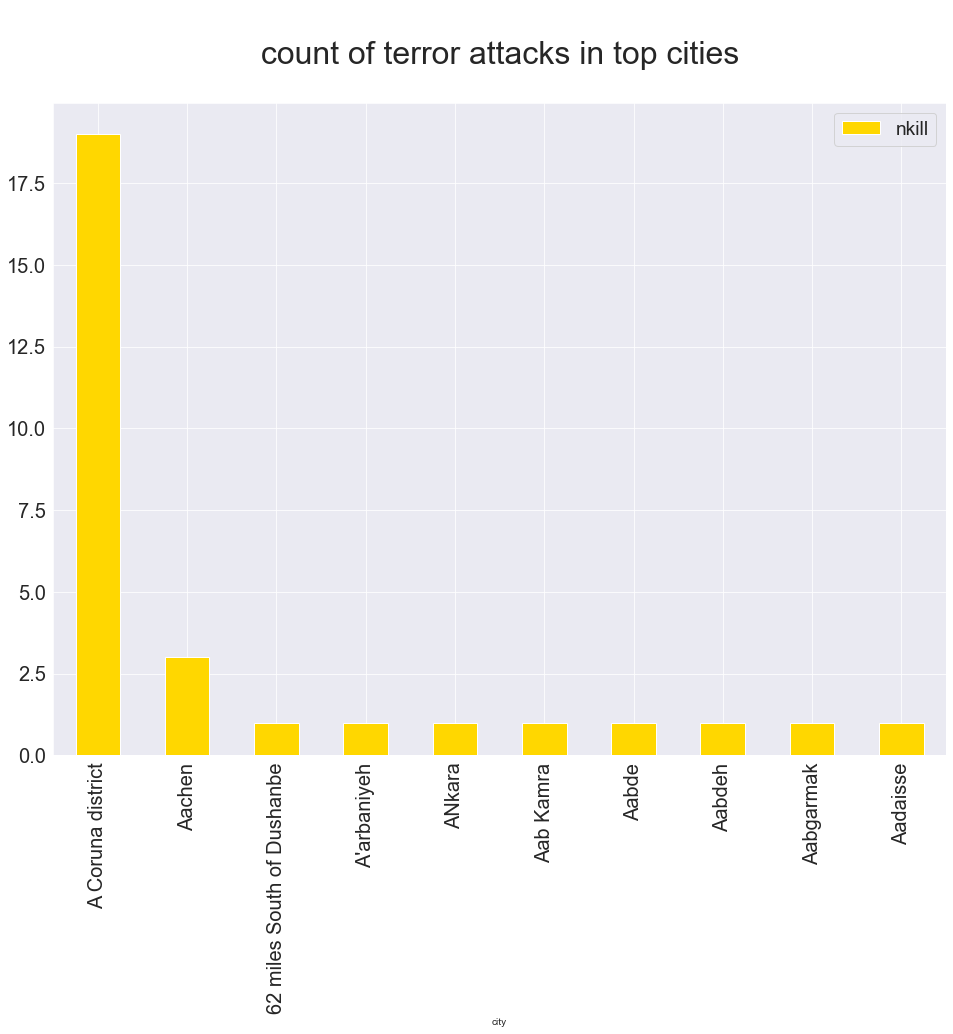

In [26]:
aggPlot('city',c = 'nkill',k='count' ,title='terror attacks in top cities')

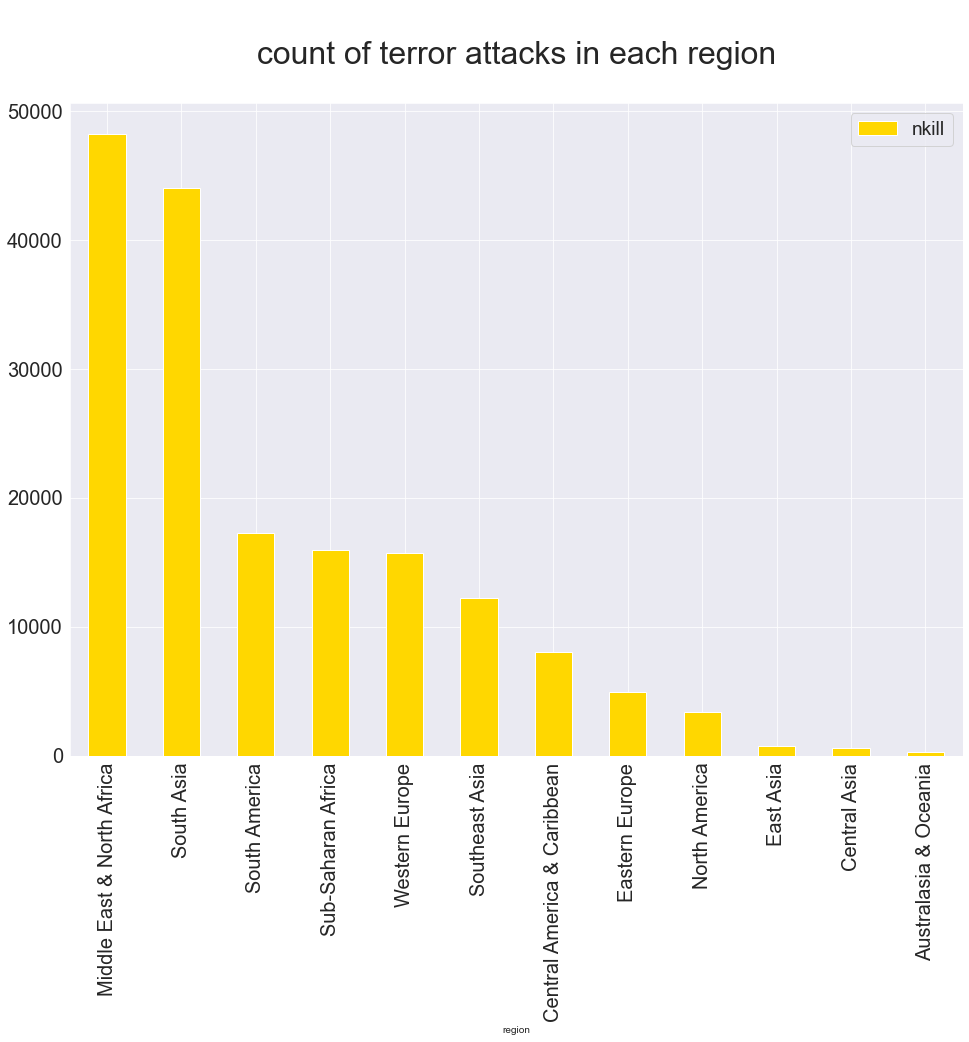

In [27]:
aggPlot('region',c = 'nkill',k='count' ,title='terror attacks in each region')

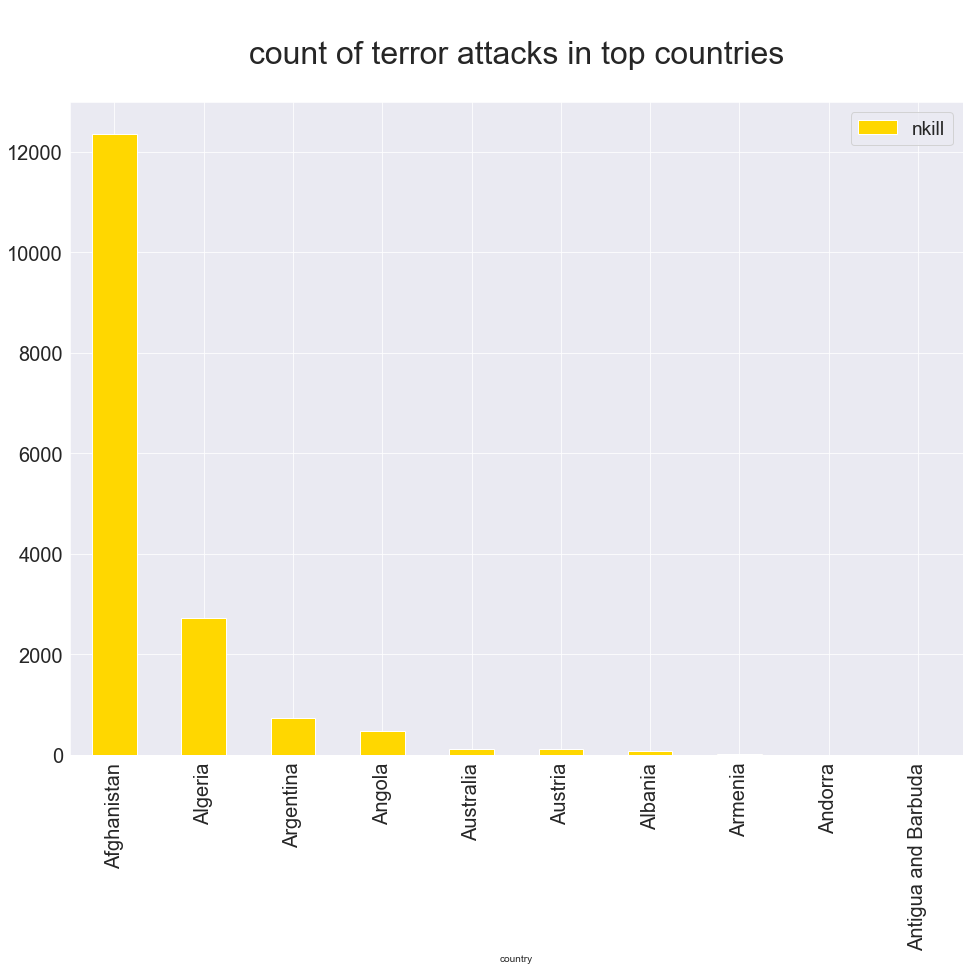

In [41]:
aggPlot('country',c = 'nkill',k='count' ,title='terror attacks in top countries')

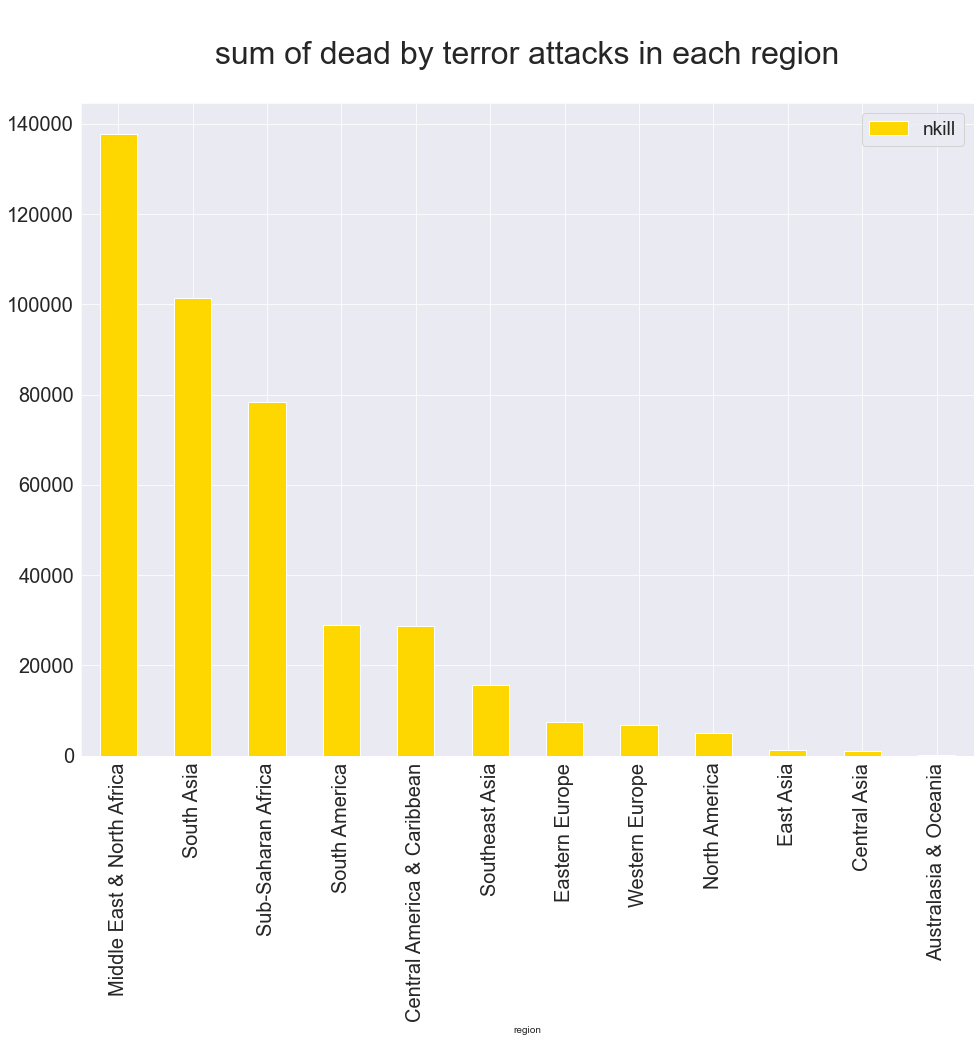

In [29]:
aggPlot('region',c = 'nkill',k='sum' ,title='dead by terror attacks in each region')

In [30]:
data.sort_values(ascending = False , by = 'nkill')[['country', 'city','nkill','nwound','year', 'month', 'dayInMonth']][:10]

,country,city,nkill,nwound,year,month,dayInMonth
133518,Iraq,Tikrit,1570.0,NaN,2014,6,12
73126,United States,New York City,1384.0,8190.0,2001,9,11
73127,United States,New York City,1383.0,8191.0,2001,9,11
55934,Rwanda,Gikoro,1180.0,0.0,1994,4,13
136283,Iraq,Sinjar,953.0,NaN,2014,8,3
133225,Iraq,Badush,670.0,0.0,2014,6,10
179671,Somalia,Mogadishu,588.0,316.0,2017,10,14
76347,Nepal,Dhading district,518.0,216.0,2004,3,21
136746,Syria,Unknown,517.0,NaN,2014,8,19
170198,Syria,Palmyra,433.0,NaN,2016,12,10


In [31]:
data.columns

Index(['id', 'year', 'month', 'dayInMonth', 'extended?', 'country', 'region',
       'provstate', 'city', 'attacktype1', 'targtype1', 'targsubtype1',
       'corp1', 'gname', 'weaptype1', 'weapsubtype1_txt', 'weaptype2',
       'weapsubtype2', 'weapdetail', 'nkill', 'nwound', 'property?',
       'propertyDemaged', 'ishostkid', 'ransom', 'ransomamt', 'nreleased',
       'dbsource'],
      dtype='object')

In [32]:
data['dead&Wound'] = data['nkill']+data['nwound']

In [33]:
data.sort_values(ascending = False , by = 'dead&Wound')[['country', 'city','nkill','nwound','dead&Wound','year', 'month', 'dayInMonth']][:10]

,country,city,nkill,nwound,dead&Wound,year,month,dayInMonth
73127,United States,New York City,1383.0,8191.0,9574.0,2001,9,11
73126,United States,New York City,1384.0,8190.0,9574.0,2001,9,11
58841,Japan,Tokyo,13.0,5500.0,5513.0,1995,3,20
68071,Kenya,Nairobi,224.0,4000.0,4224.0,1998,8,7
159773,Iraq,Taza Khurmatu,3.0,1500.0,1503.0,2016,3,9
61548,Sri Lanka,Colombo,90.0,1272.0,1362.0,1996,1,31
55934,Rwanda,Gikoro,1180.0,0.0,1180.0,1994,4,13
85682,Chad,N'Djamena,160.0,1001.0,1161.0,2008,2,2
76953,Russia,Beslan,344.0,727.0,1071.0,2004,9,1
81098,India,Mumbai,188.0,817.0,1005.0,2006,7,11


year  month  dayInMonth
2007  8      14            1000.0
2017  5      31             587.0
2006  11     23             475.0
2007  2      3              370.0
1985  6      23             329.0
                            ...  
1995  8      21               0.0
             13               0.0
             11               0.0
             7                0.0
1970  1      28               0.0
Name: dead&Wound, Length: 5820, dtype: float64

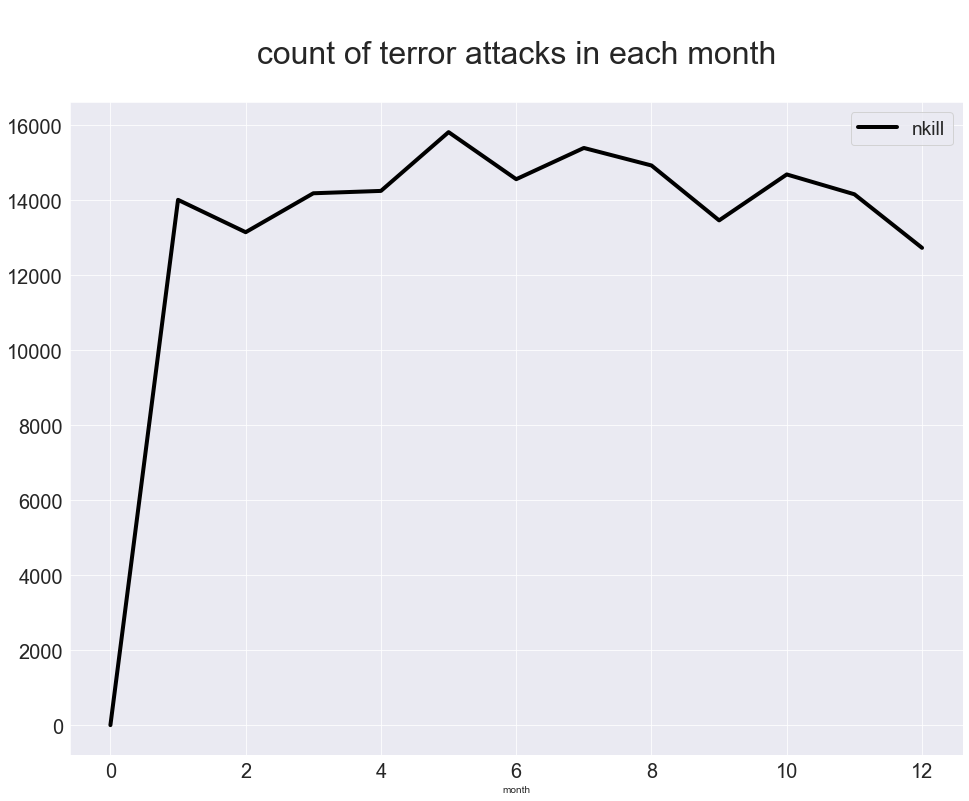

In [34]:
aggPlot('month',c = 'nkill',k='count' ,title='terror attacks in each month')

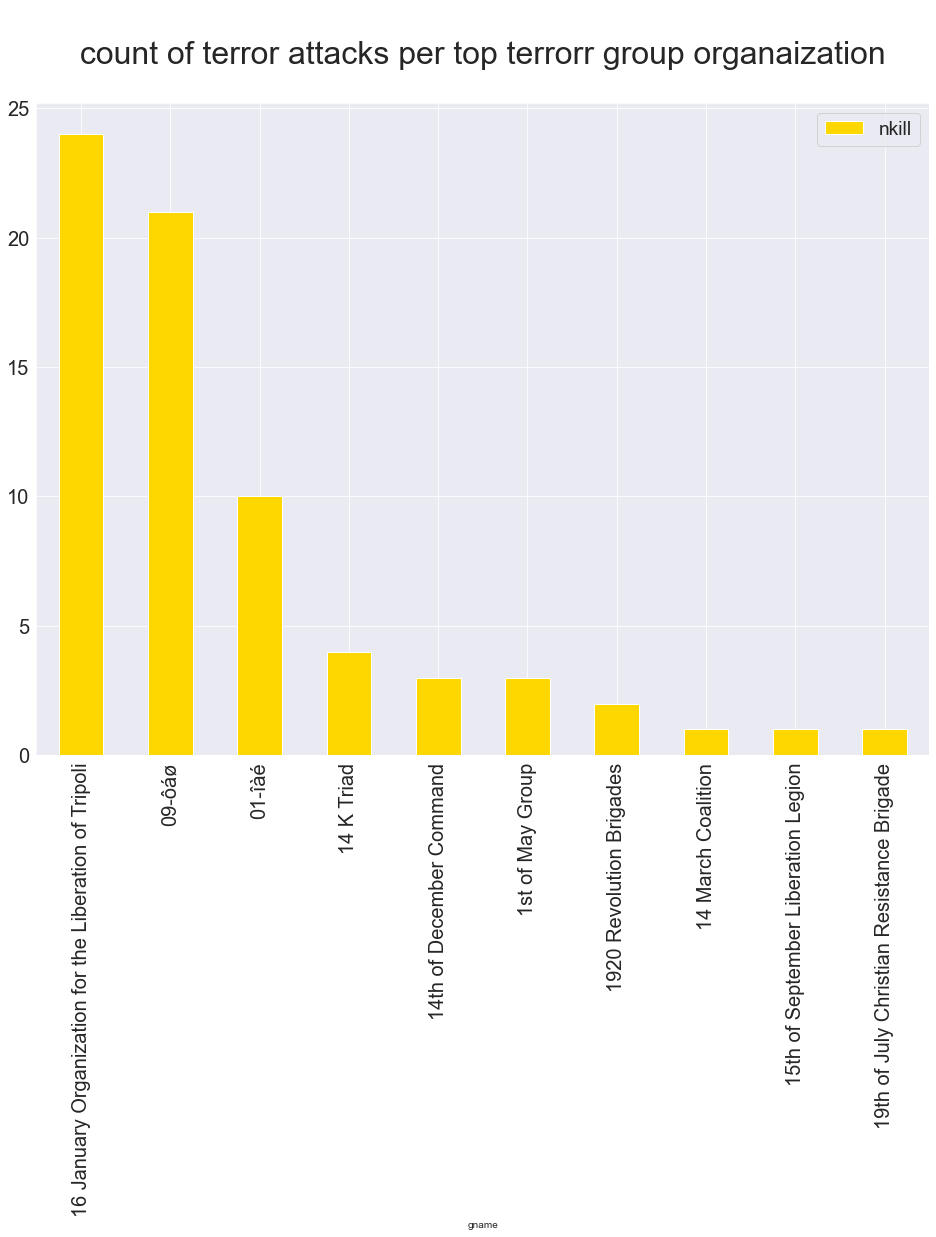

In [35]:
aggPlot('gname',c = 'nkill',k='count' ,title='terror attacks per top terrorr group organaization')

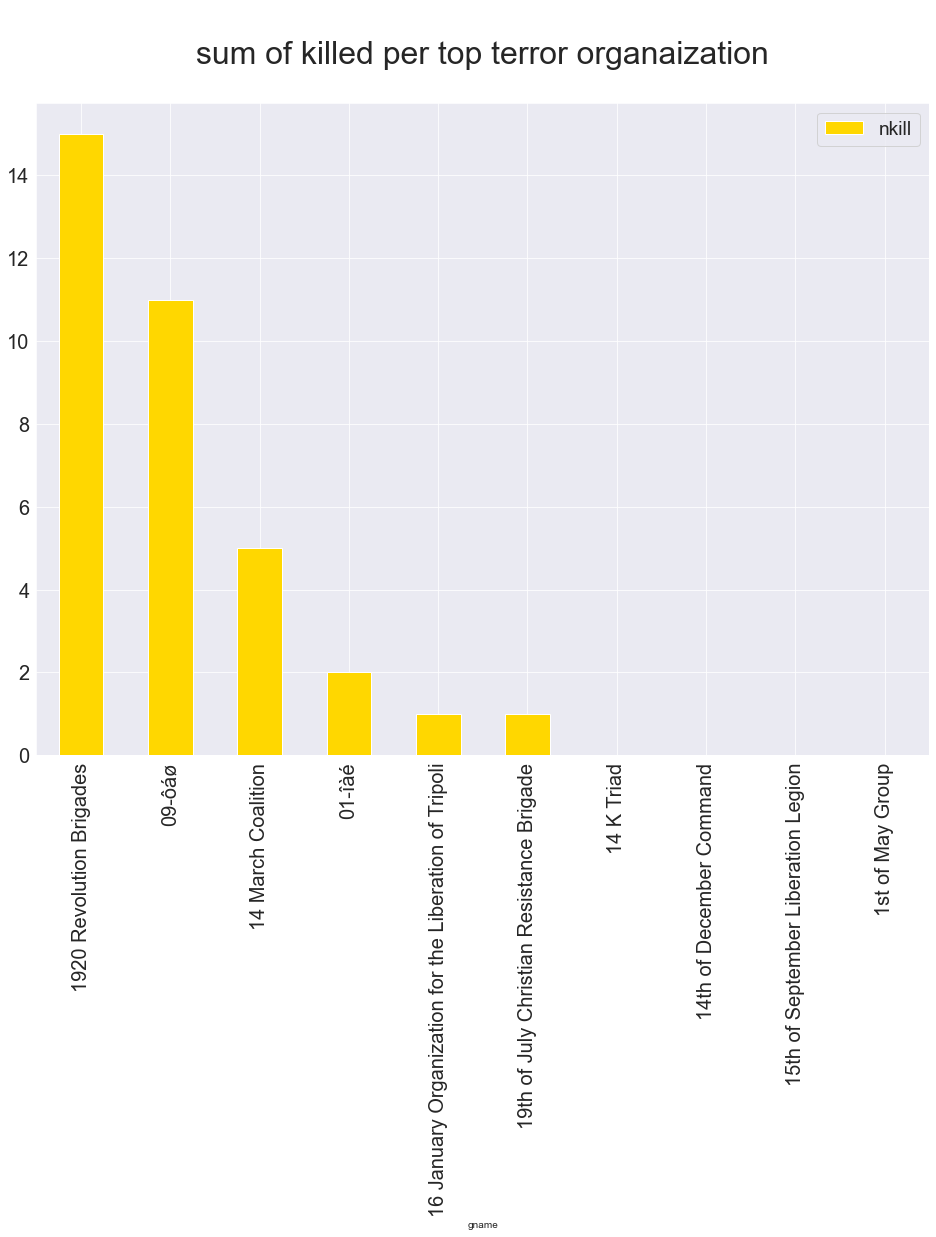

In [36]:
aggPlot('gname',c = 'nkill',k='sum' ,title='killed per top terror organaization')

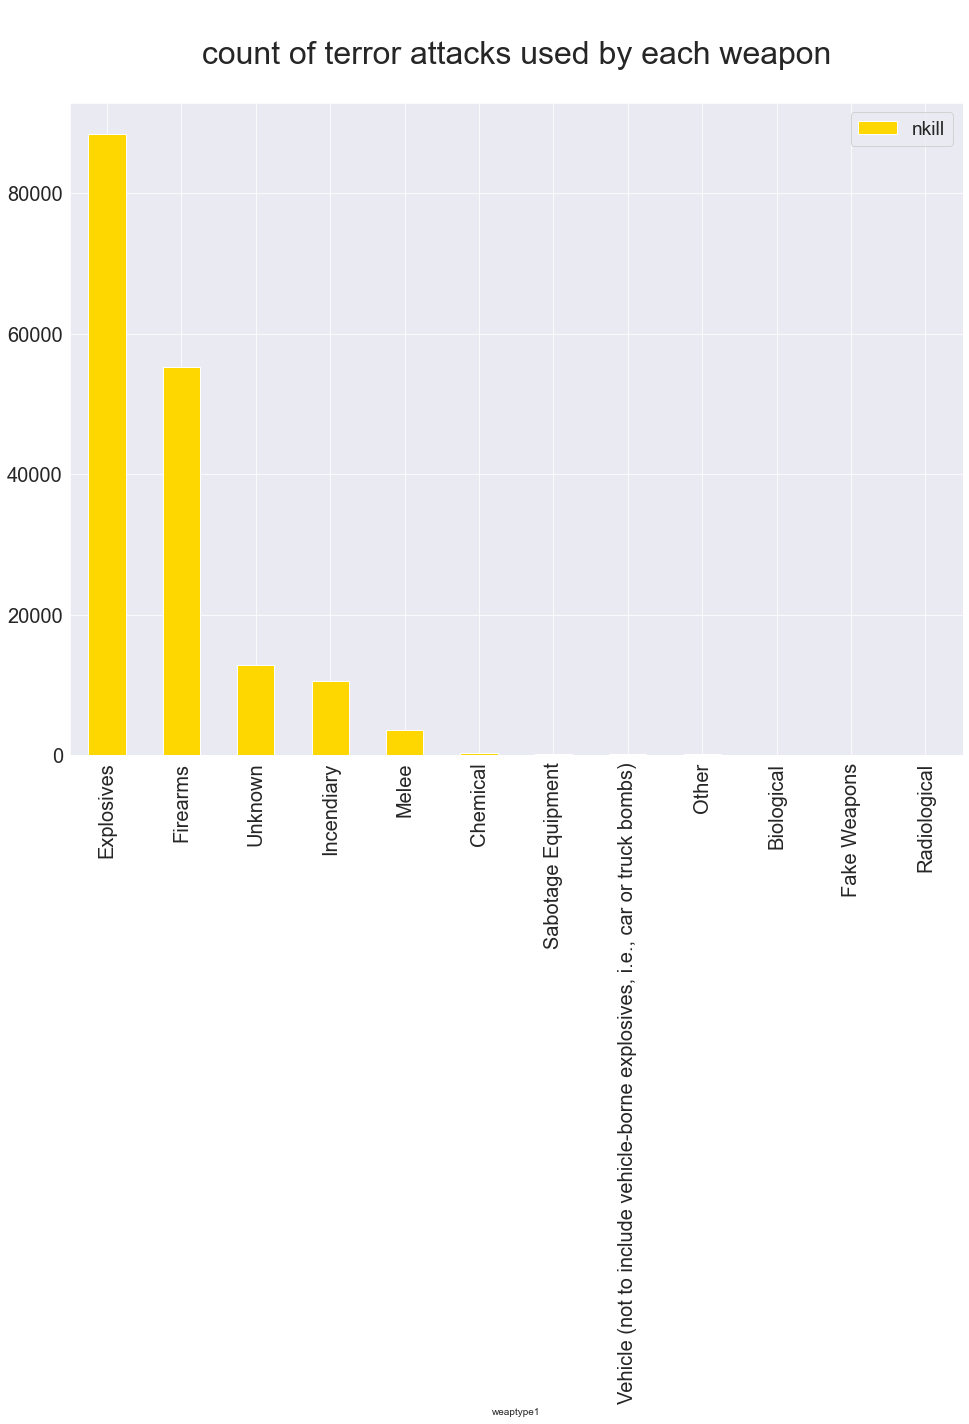

In [37]:
aggPlot('weaptype1',c = 'nkill',k='count' ,title='terror attacks used by each weapon')

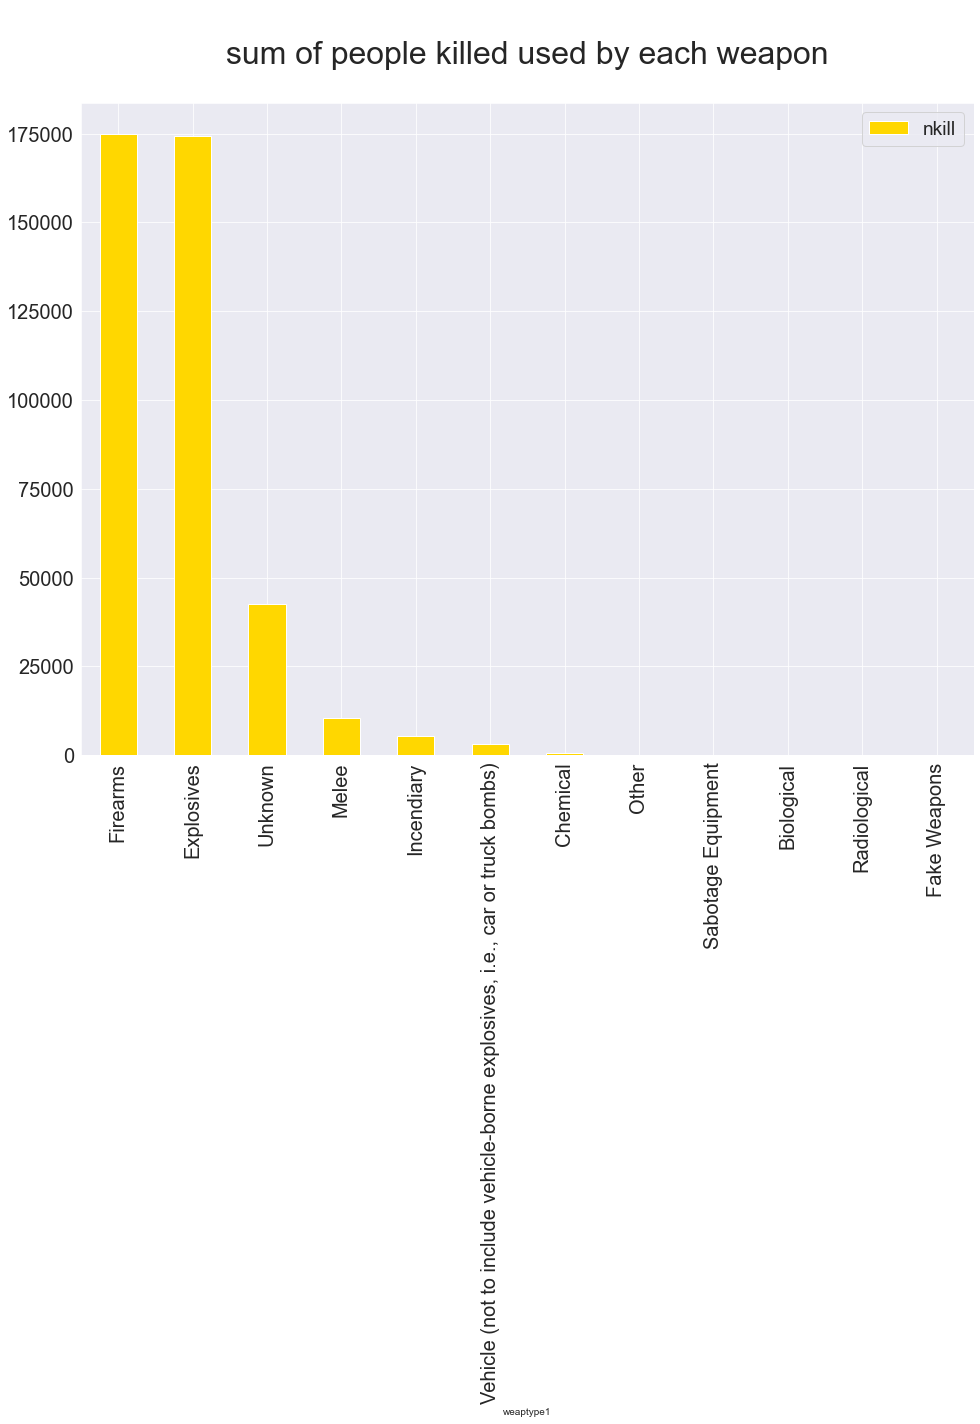

In [38]:
aggPlot('weaptype1',c = 'nkill',k='sum' ,title='people killed used by each weapon')

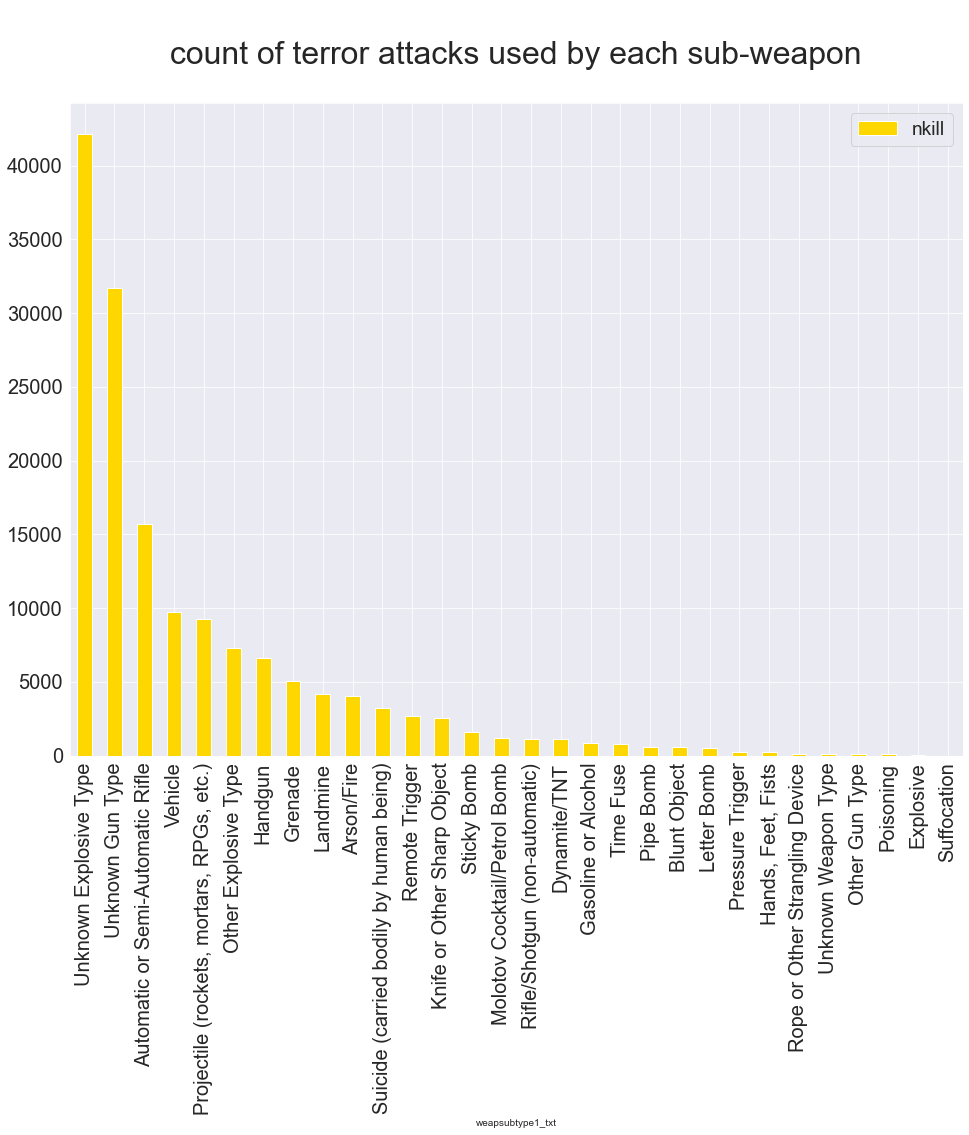

In [39]:
aggPlot('weapsubtype1_txt',c = 'nkill',k='count' ,title='terror attacks used by each sub-weapon')

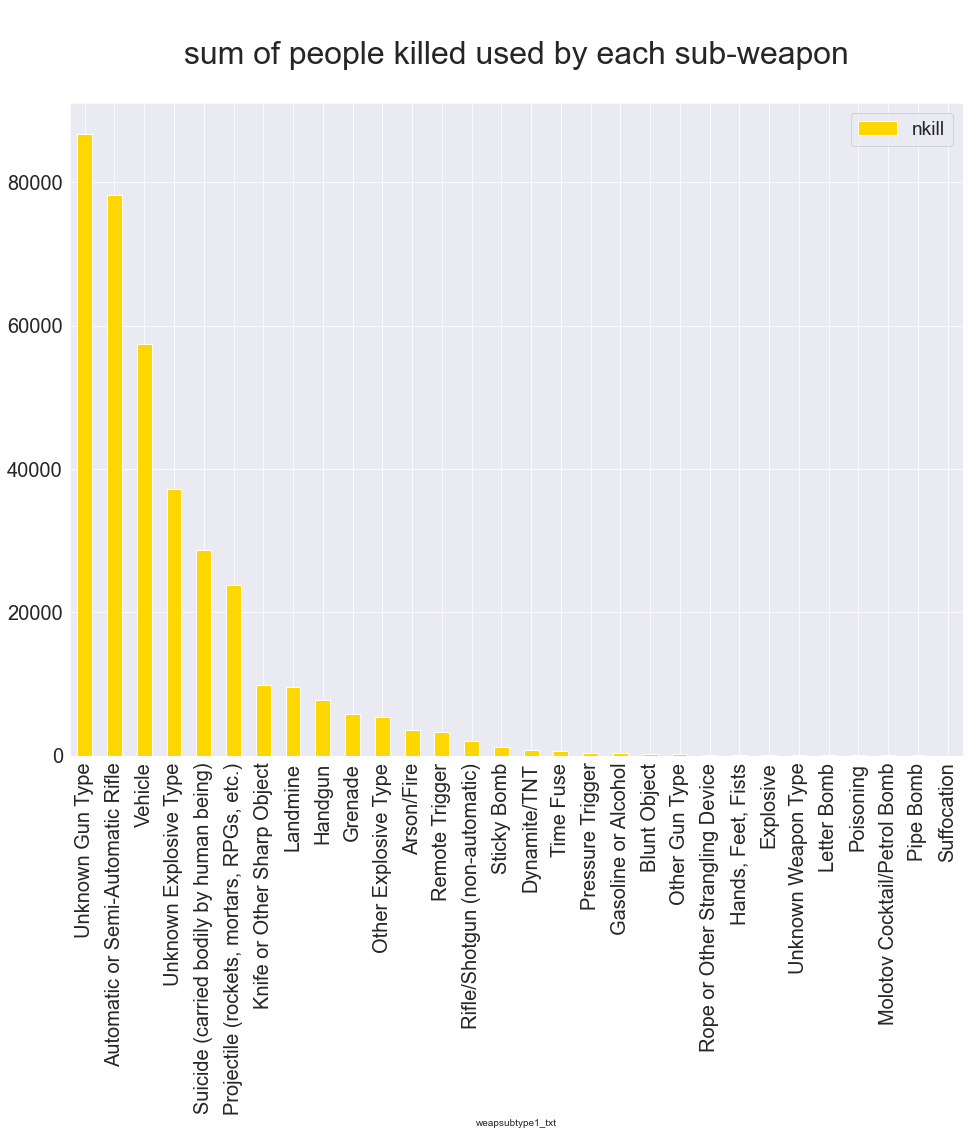

In [40]:
aggPlot('weapsubtype1_txt',c = 'nkill',k='sum' ,title='people killed used by each sub-weapon')